In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import gensim
import string

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.model_selection import train_test_split


C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
stop_factory = StopWordRemoverFactory()
more_stopword = ['dengan', 'ia','bahwa','oleh']
data = stop_factory.get_stop_words()+more_stopword
stopword = stop_factory.create_stop_word_remover()

Fact = StemmerFactory()
stemmer = Fact.create_stemmer()
# lemmatizer = WordNetLemmatizer()

In [3]:
cwd = os.getcwd()
data_path = os.path.join(cwd, 'dataset')

files = []
for file in os.listdir(data_path):
    if file.endswith('.csv'):
        files.append(os.path.join(data_path, file))
        
print(files, len(files))

['C:\\Users\\LENOVO\\GitHub\\bangkit_capstone\\dataset\\250 news with valid hoax label.csv', 'C:\\Users\\LENOVO\\GitHub\\bangkit_capstone\\dataset\\500_berita_indonesia.csv', 'C:\\Users\\LENOVO\\GitHub\\bangkit_capstone\\dataset\\600 news with valid hoax label.csv', 'C:\\Users\\LENOVO\\GitHub\\bangkit_capstone\\dataset\\df_processed.csv', 'C:\\Users\\LENOVO\\GitHub\\bangkit_capstone\\dataset\\Scrapping.csv'] 5


In [4]:
raw_data1 = pd.read_csv(files[1], sep = ';', encoding_errors = 'ignore')
raw_data2 = pd.read_csv(files[2], sep = ';', encoding_errors = 'ignore')
raw_data3 = pd.read_csv(files[4], sep = ';', encoding_errors = 'ignore')

In [5]:
raw_data1.sample(5)

,kategori,berita
105,valid,Indonesia berduka karena tragedi di Surabaya p...
459,hoax,"""Magicom merupakan penanak nasi dengan panci y..."
281,hoax,"""Jakarta, HanTer – Rencana pemerintah yang ing..."
6,valid,"""Komandan ISIS Afrika Tewas karena Serangan Ud..."
257,hoax,"""AA Gym : Lebih baik pilih pemimpin koruptor t..."


In [6]:
raw_data2.sample(5)

,berita,tagging
503,Jakarta-Warganet sampai sekarang masih kebingu...,Valid
331,"BEKASI, Maraknya permen dot yang diduga berisi...",Hoax
68,Serangan stroke bisa terjadi pada siapa saja d...,Valid
334,Ketua Umum Dewan Pimpinan Daerah (DPD) Lembaga...,Hoax
423,Seorang netizen membagikan berita kerusuhan ya...,Hoax


In [7]:
raw_data3.sample(5)

,Label,Headline,Body,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
788,0,Ayooo ke Musium Gajah Ada Pameran Budaya Arab,SUMBER: Media Sosial NARASI: Assalamuallaikum ...,NaN,NaN,NaN,NaN
928,0,Pegawai PLN Meninggal Tersengat Listrik dari ...,Sumber : Media Sosial Narasi : Penjelasan & Fa...,NaN,NaN,NaN,NaN
200,1,KemenPAN-RB Tidak Terlibat Dalam Acara Seminar...,Pihak Kementerian Pendayagunaan Aparatur Negar...,NaN,NaN,NaN,NaN
838,0,Foto Perempuan Mengenakan Kaos Bertuliskan Te...,SUMBER: Pertanyaan dari pengikut FAFHH https:/...,NaN,NaN,NaN,NaN
462,0,"Pertanda Alam, Kera Putih Mulai Turun Dari Gun...",Baru-baru ini masyarakat disekitar Gunung Agun...,NaN,NaN,NaN,NaN


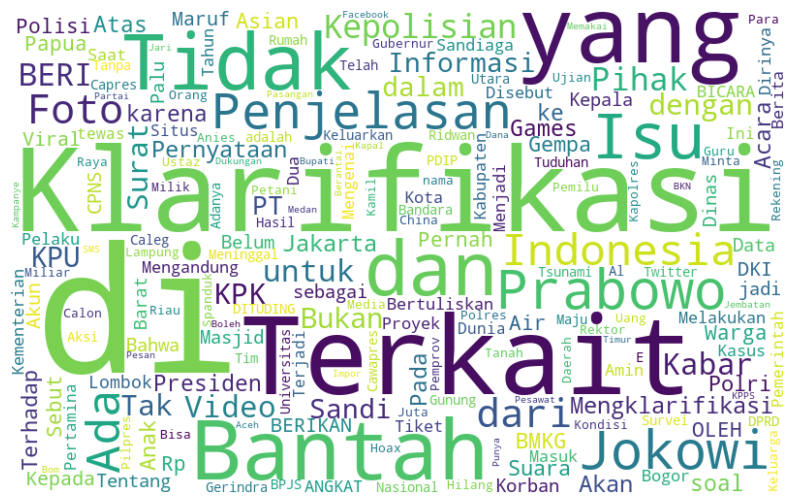

In [8]:
from wordcloud import WordCloud

true_df = raw_data3[raw_data3['Label'] == 1]
false_df = raw_data3[raw_data3['Label'] == 0]

real_titles = true_df.Headline
real_titles_ls = [text for text in real_titles]
# print(alls)
real_all_words = ' '.join(real_titles)
wordcloud_real = WordCloud(background_color='white',
    width= 800, height= 500,
    max_font_size = 180,
    collocations = False).generate(real_all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis("off")
plt.show()

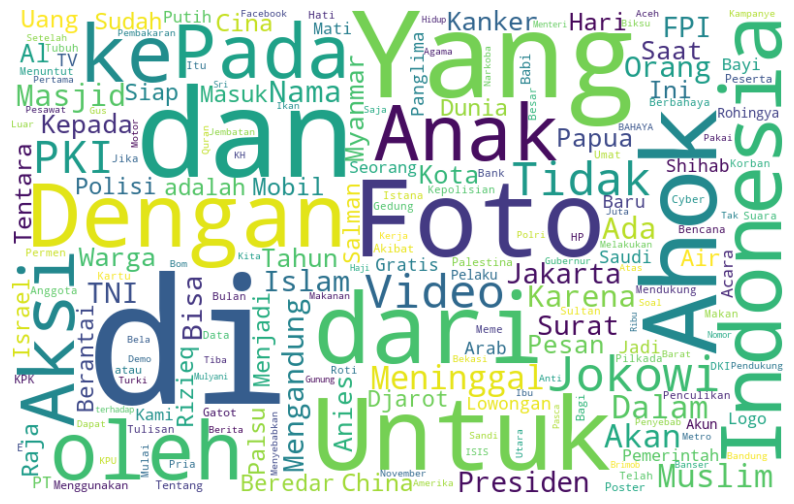

In [9]:
real_titles = false_df.Headline
real_titles_ls = [text for text in real_titles]
# print(alls)
real_all_words = ' '.join(real_titles)
wordcloud_real = WordCloud(background_color='white',
    width= 800, height= 500,
    max_font_size = 180,
    collocations = False).generate(real_all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
data3 = raw_data3.drop(columns = raw_data3.columns[3:])
data3.sample(5)

,Label,Headline,Body
753,0,Tol sala3 ambrol,=SUMBER= (1) Pertanyaan dari salahsatu pengiku...
455,0,Logo Bank Indonesia Pecahan Seratus Ribu Terda...,Beredar Foto yang menunjukkan seorang tentara ...
336,1,MUNCUL ISU PENCULIKAN ANAK DI WILAYAH CILODONG...,Postingan ini berisi klarifikasi pihak kepoli...
806,0,Daun Berpaku di Madiun,SUMBER: Media Sosial NARASI: DAUN BERPAKU.. Be...
1115,0,Yang Benci FPI Ada Lima (Foto Gus Mus),Muncul postingan hoax di Instagram dan Twitter...


In [11]:
data1 = raw_data1[['berita', 'kategori']]
data1.rename(columns = {'kategori' : 'label'}, inplace = True)

data2 = raw_data2.rename(columns = {'tagging' : 'label'})

data3 = raw_data3[['Body', 'Label']]
data3.rename(columns = {'Label' : 'label', 'Body' : 'berita'}, inplace = True)

data1.columns, data2.columns, data3.columns


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6792\2853940649.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.rename(columns = {'Label' : 'label', 'Body' : 'berita'}, inplace = True)


(Index(['berita', 'label'], dtype='object'),
 Index(['berita', 'label'], dtype='object'),
 Index(['berita', 'label'], dtype='object'))

In [12]:
df = pd.concat([data1, data2, data3], ignore_index = True)
df.sample(5)

,berita,label
2027,SUMBER: Media Online (https://www.jpnn.com/new...,0
552,Mungkin sebagian dari pembaca sudah pernah mem...,Valid
396,"""Mahasiswi UNJ Meninggal Karena Kehabisan Oksi...",hoax
2160,Narasi: Dari Turki menyapa Aksi Super Damai In...,0
850,Game Pokemon Go yang sedang mewabah telah mena...,Valid


In [13]:
df.label.unique()

array(['valid', 'hoax', 'Valid', 'Hoax', 1, 0], dtype=object)

In [14]:
df.label = df.label.replace(['valid', 'hoax', 'Valid', 'Hoax'], [0, 1, 0, 1])
df.label.unique()

array([0, 1], dtype=int64)

In [15]:
df.head()

,berita,label
0,"""Gunung Agung erupsi untuk pertama kali pada 2...",0
1,"""Jakarta, CNN Indonesia -- Menteri BUMN Erick ...",0
2,"""Dosen Fakultas Kedokteran Hewan IPB, Yusuf Ri...",0
3,"""Jakarta - Dua anggota TNI, Serda N dan Serda ...",0
4,"""Akui Tembak Jatuh Pesawat Ukraina, Iran Tuai ...",0


<Axes: xlabel='label'>

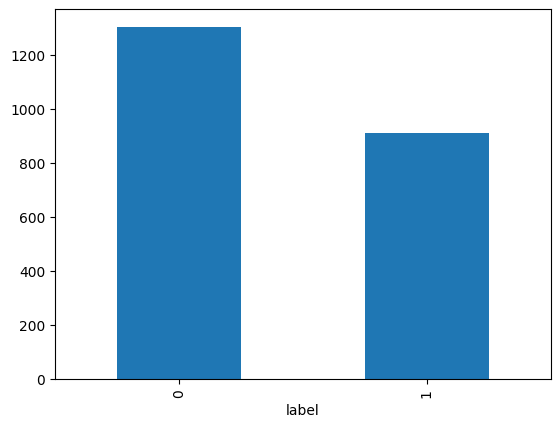

In [16]:
df.label.value_counts().plot(kind = 'bar')

In [17]:
df[df.duplicated()]

,berita,label
20,"""Jokowi Dapat Anugerah Adat Kehormatan Maluku""",0
21,"""Maluku, CNN Indonesia -- Presiden Joko Widodo...",0
80,"Bencana tanah longsor menerjang kota Mocoa, Ko...",0
175,"Serangan Bom Truk di Mogadishu, Somalia (14 Ok...",0
318,"""APA yang ada dalam pikiran Anda ketika meliha...",1
320,"""Jakarta, HanTer – Rencana pemerintah yang ing...",1
377,"""Ahok Bohong tentang Pengadaan Unit Busway dar...",1
472,"""Info dari BMKG besok diprediksi Bengkulu akan...",1
489,"""SMS Dukungan Buat Jokowi di Pilpres 2019, MUI...",1
490,"""China Menunggu Kekacauan Indonesia, Bila Indo...",1


In [18]:
df = df.drop_duplicates()
df[df.duplicated()]

,berita,label


In [19]:
df.shape

(2198, 2)

In [20]:
df.berita[0]

'"Gunung Agung erupsi untuk pertama kali pada 21 November 2017. Letusan terjadi pada pukul 17.05 Wita. Asap teramati bertekanan sedang dengan warna kelabu tebal dan dengan ketinggian maksimum sekitar 700 m di atas puncak. Abu letusan bertiup lemah ke arah Timur-Tenggara. Masyarakat diminta tetap tenang dan selalu mengikuti rekomendasi PVMBG. Gunung Agung yang terletak di Kabupaten Karangasem Provinsi Bali ini kembali erupsi pada Sabtu 25 November 2017 pukul 17.30 Wita. Abu bertekanan sedang setinggi 1.500 m keluar di atas puncak Gunung Agung. Ini merupakan erupsi kedua. Kepala Pusat Data Informasi dan Humas Badan Nasional Penanggulangan Bencana (BNPB) Sutopo Purwo Nugroho mengatakan, erupsi secara visual teramati dari daerah Culik dan Batulompeh ke arah Barat- Barat daya, asap kelabu-kehitaman tekanan sedang. Dia menuturkan, status Gunung Agung tetap Siaga (level 3). Hingga kemudian, Pusat Vulkanologi dan Mitigasi Bencana Geologi (PVMBG) menaikkan status Gunung Agung dari Siaga atau le

In [21]:
def pipeline(text):
    text = re.sub(r'http\S+', '', text.lower())
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans("","",string.punctuation))
#     text = tokenizer(text)
    text = stemmer.stem(text)
    text = stopword.remove(text)
    return text.split()

pipeline(df.berita[0])

['gunung',
 'agung',
 'erupsi',
 'pertama',
 'kali',
 'november',
 'letus',
 'jadi',
 'pukul',
 'wita',
 'asap',
 'tekan',
 'sedang',
 'warna',
 'kelabu',
 'tebal',
 'tinggi',
 'maksimum',
 'm',
 'atas',
 'puncak',
 'abu',
 'letus',
 'tiup',
 'lemah',
 'arah',
 'timurtenggara',
 'masyarakat',
 'minta',
 'tetap',
 'tenang',
 'selalu',
 'ikut',
 'rekomendasi',
 'pvmbg',
 'gunung',
 'agung',
 'letak',
 'kabupaten',
 'karangasem',
 'provinsi',
 'bal',
 'kembali',
 'erupsi',
 'sabtu',
 'november',
 'pukul',
 'wita',
 'abu',
 'tekan',
 'sedang',
 'setinggi',
 'm',
 'keluar',
 'atas',
 'puncak',
 'gunung',
 'agung',
 'rupa',
 'erupsi',
 'kepala',
 'pusat',
 'data',
 'informasi',
 'humas',
 'badan',
 'nasional',
 'tanggulang',
 'bencana',
 'bnpb',
 'sutopo',
 'purwo',
 'nugroho',
 'kata',
 'erupsi',
 'cara',
 'visual',
 'daerah',
 'culik',
 'batulompeh',
 'arah',
 'barat',
 'barat',
 'daya',
 'asap',
 'kelabukehitaman',
 'tekan',
 'sedang',
 'tutur',
 'status',
 'gunung',
 'agung',
 'tetap',
 

In [21]:
X_processed = X.apply(lambda x : pipeline(x))

df_processed = pd.DataFrame({
    'berita' : X_processed,
    'label' : y
})

df_processed.to_csv(os.path.join(data_path, 'df_processed.csv'))